<a href="https://colab.research.google.com/github/MedjialeuJordan/Machine-Learning-Projects/blob/main/CIFAR_10_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⭐CNN Model trained using the CIFAR-10 dataset

In [1]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Normalisation du dataset

In [2]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Taille du dataset", X_train.shape,y_train.shape)

Taille du dataset (50000, 32, 32, 3) (50000, 1)


Visualization

/tmp/ipython-input-3332202948.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


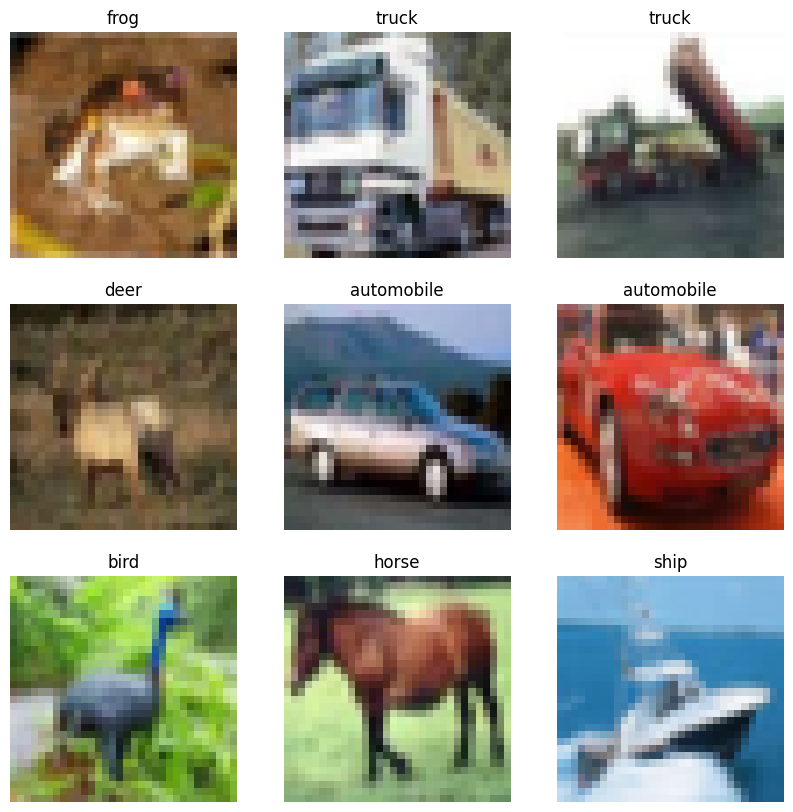

In [4]:
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[int(y_train[i])])
  plt.axis('off')

plt.show()

Model Architecture

In [14]:
from tensorflow.keras import layers, models

model = models.Sequential([
    ###1st Bloc
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    ###2nd Bloc
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    ###3rd Bloc

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])



Entrainement


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 137ms/step - accuracy: 0.3809 - loss: 1.8674 - val_accuracy: 0.5698 - val_loss: 1.2096
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 135ms/step - accuracy: 0.6186 - loss: 1.0901 - val_accuracy: 0.6670 - val_loss: 0.9503
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - accuracy: 0.6872 - loss: 0.8965 - val_accuracy: 0.7252 - val_loss: 0.7891
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 259s 136ms/step - accuracy: 0.7249 - loss: 0.7951 - val_accuracy: 0.6622 - val_loss: 1.0062
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 213s 136ms/step - accuracy: 0.7477 - loss: 0.7364 - val_accuracy: 0.7593 - val_loss: 0.7025
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 137ms/step - accuracy: 0.7666 - loss: 0.6704 - val_accuracy: 0.7171 - val_loss: 0.8726
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 136ms/step - accuracy: 0.7904 - loss: 0.6220 - val_accuracy: 0.7718 - val_loss: 0.6546
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 136ms/step - ac

Visualisation des performances

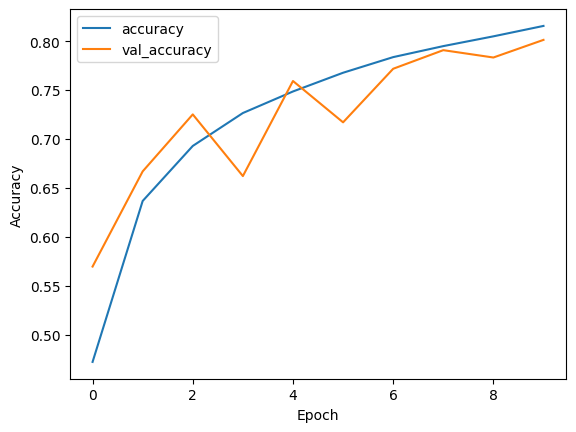

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluation finale

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy:, {test_acc:.2f}")

313/313 - 9s - 30ms/step - accuracy: 0.8013 - loss: 0.5917
Test accuracy:, 0.80


Prediction

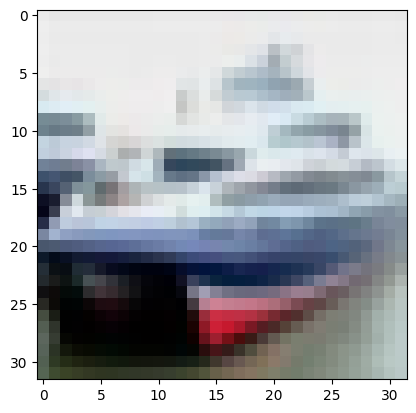

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: ship


In [21]:
import numpy as np

index = 1
img = X_test[index]
plt.imshow(img)

plt.show()

pred= model.predict(np.expand_dims(img, axis=0))
print(f"Prediction: {class_names[np.argmax(pred)]}")